# Reward shaping analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import tri
from rlgym.utils import common_values
from reward_functions import common, extra

## Arena plot

The corner points provide us with the entire arena top-level plot grid

In [2]:
# *Facing orange goal*

# X, right is minus
x0 = - common_values.SIDE_WALL_X
x1 = common_values.SIDE_WALL_X
# Y, back is minus
y0 = - common_values.BACK_WALL_Y
y1 = common_values.BACK_WALL_Y
# Z, up is plus
z0 = 0
z1 = common_values.CEILING_Z

# Corner walls, corner near goal is first element
corner_offset = 1152
# right corner back
right_corner0 = np.array([[x0 + corner_offset, y0], [x0, y0 + corner_offset]])
# left corner back
left_corner0 = np.array([[x1 - corner_offset, y0], [x1, y0 + corner_offset]])
# right corner front
right_corner1 = np.array([[x0 + corner_offset, y1], [x0, y1 - corner_offset]])
# left corner front
left_corner1 = np.array([[x1 - corner_offset, y1], [x1, y1 - corner_offset]])

In [3]:
x = np.array([right_corner0[:,0], left_corner0[:,0], right_corner1[:,0], left_corner1[:,0]]).flatten()
y = np.array([right_corner0[:,1], left_corner0[:,1], right_corner1[:,1], left_corner1[:,1]]).flatten()

In [4]:
triang = tri.Triangulation(x, y)
print(triang.triangles)

[[1 0 2]
 [2 3 1]
 [7 5 1]
 [1 3 7]
 [4 5 7]
 [7 6 4]]


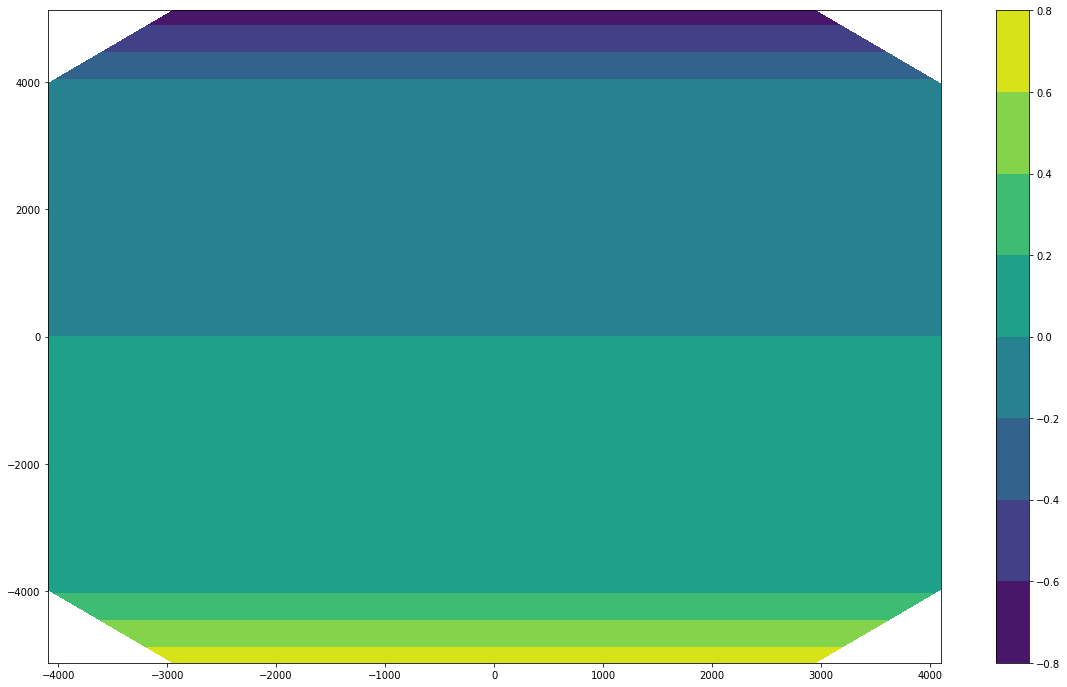

In [5]:
# right is orange goal, left is blue goal
z_dummy = np.sin(y)

plt.figure(figsize=(20, 12))
contour_plot = plt.tricontourf(triang, z_dummy)
plt.colorbar(contour_plot)
plt.show()

## Rewards